In [21]:
from sklearn import datasets, metrics, tree, svm, neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score


SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# SVC MODEL

from sklearn.svm import SVC
svc = SVC(random_state = SEED)

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

# BERNOULLI NAIVE BAYES
bnb = BernoulliNB()

# Train RandomForestClassifier
rfe = RandomForestClassifier(max_depth=6)

# Train XGBOOST Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=SEED)

# Train Gradient-Boosting Classifier
grb = GradientBoostingClassifier(learning_rate=1.1)

In [22]:
# , usecols = ['IPV4_SRC_ADDR','L4_SRC_PORT','IPV4_DST_ADDR','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_BYTES','IN_PKTS','OUT_BYTES','OUT_PKTS','TCP_FLAGS','CLIENT_TCP_FLAGS','SERVER_TCP_FLAGS','FLOW_DURATION_MILLISECONDS','DURATION_IN','MIN_TTL','MAX_TTL','LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT','MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','SRC_TO_DST_SECOND_BYTES','DST_TO_SRC_SECOND_BYTES','SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT','NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN','TCP_WIN_MAX_OUT','ICMP_TYPE','ICMP_IPV4_TYPE','DNS_QUERY_ID','DNS_QUERY_TYPE','DNS_TTL_ANSWER','FTP_COMMAND_RET_CODE','Label','Attack']
#케글불러오기시에 에러가 일어나서 데이터셋을 다운받는 방법으로 전환
df = pd.read_csv("NF-UQ-NIDS-v2.csv",index_col=False, nrows=1)
cols = df.columns
df1 = pd.read_csv("NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=1, nrows=200000, index_col=False)
df2 = pd.read_csv("NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=200001, nrows=200000, index_col=False)
df3 = pd.concat([df1, df2], ignore_index = True)

In [23]:
df3

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,192.168.100.149,34255,192.168.100.3,80,17,188.0,140,5,0,0,...,0,0,0,0,0,0,0.0,1,DDoS,NF-BoT-IoT-v2
399996,192.168.100.148,51262,192.168.100.3,80,17,188.0,56,2,0,0,...,0,0,0,0,0,0,0.0,1,DDoS,NF-BoT-IoT-v2
399997,192.168.1.32,48031,192.168.1.186,48319,6,0.0,48,1,0,0,...,0,0,0,0,0,0,0.0,1,scanning,NF-ToN-IoT-v2
399998,192.168.100.147,50363,192.168.100.3,80,6,7.0,280,2,0,0,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2


In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(df3['IPV4_SRC_ADDR'])

srcaddr = LE.fit_transform(df1['IPV4_SRC_ADDR'])
df1['IPV4_SRC_ADDR'] = pd.Series(srcaddr)

srcaddr = LE.fit_transform(df2['IPV4_SRC_ADDR'])
df2['IPV4_SRC_ADDR'] = pd.Series(srcaddr)

In [25]:
LE.fit(df3['IPV4_DST_ADDR'])

dstaddr = LE.fit_transform(df1['IPV4_DST_ADDR'])
df1['IPV4_DST_ADDR'] = pd.Series(dstaddr)

dstaddr = LE.fit_transform(df2['IPV4_DST_ADDR'])
df2['IPV4_DST_ADDR'] = pd.Series(dstaddr)


In [26]:
X1 = df1.drop(['Attack','Label','Dataset'], axis=1)
Y1 = df1["Attack"]

X1_test = df2.drop(['Attack','Label','Dataset'], axis=1)
Y1_test = df2["Attack"]

In [27]:
LE = LabelEncoder()
LE.fit(df3['Attack'])

multilbl = LE.transform(Y1)
Y1 = pd.Series(multilbl)

multilbl = LE.transform(Y1_test)
Y1_test = pd.Series(multilbl)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X1_object = X1.select_dtypes("object")
X1_int = X1.select_dtypes(exclude = "object")

X1_columns = X1_int.columns

imputer.fit(X1_int)
X1_int = imputer.transform(X1_int)
X1_int = pd.DataFrame(X1_int)
X1_int.columns = X1_columns

X1_object = X1_object.fillna("unknown")
X1 = X1_object.join(X1_int)

In [29]:
X1_object = X1_test.select_dtypes("object")
X1_int = X1_test.select_dtypes(exclude = "object")

X1_columns = X1_int.columns

imputer.fit(X1_int)
X1_int = imputer.transform(X1_int)
X1_int = pd.DataFrame(X1_int)
X1_int.columns = X1_columns

X1_object = X1_object.fillna("unknown")
X1_test = X1_object.join(X1_int)

In [30]:
X_train_1 = X1
X_test_1 =  X1_test
y_train_1 = Y1
y_test_1 = Y1_test

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# store the columns
cols = X_train_1.columns

# transform the data
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns = cols)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns = cols)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

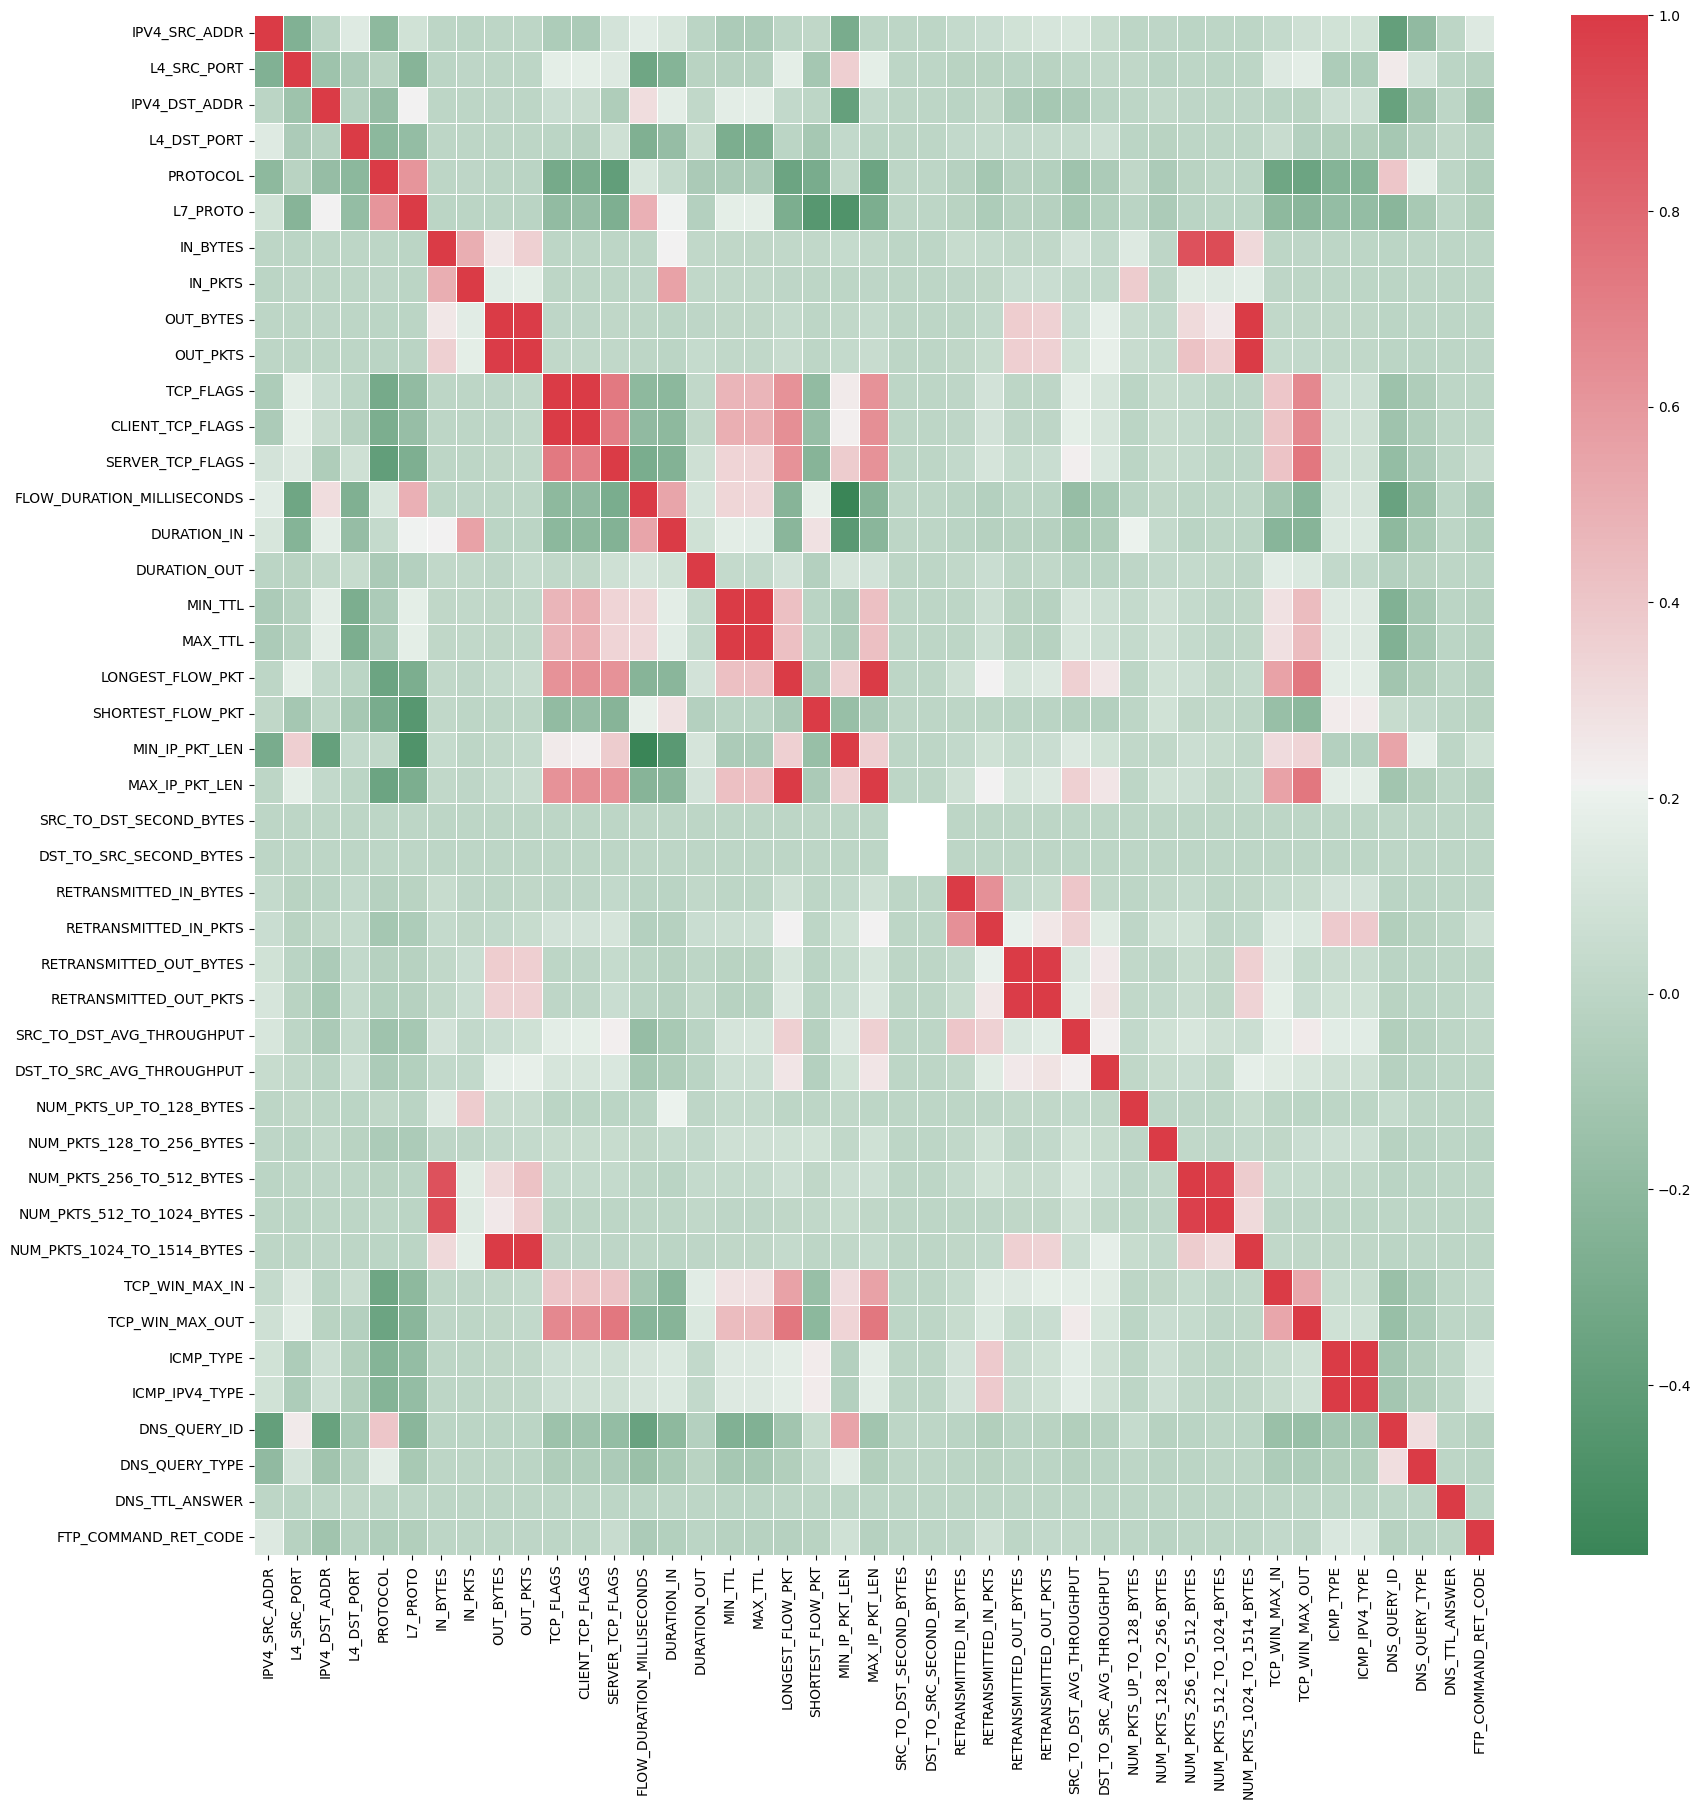

In [33]:
plt.figure(figsize = (20,20))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
attrb_reln = sns.heatmap(X1.corr(),linewidths=0.5, cmap=cmap)
plt.savefig('correlations_dataset.jpg', dpi=1000)

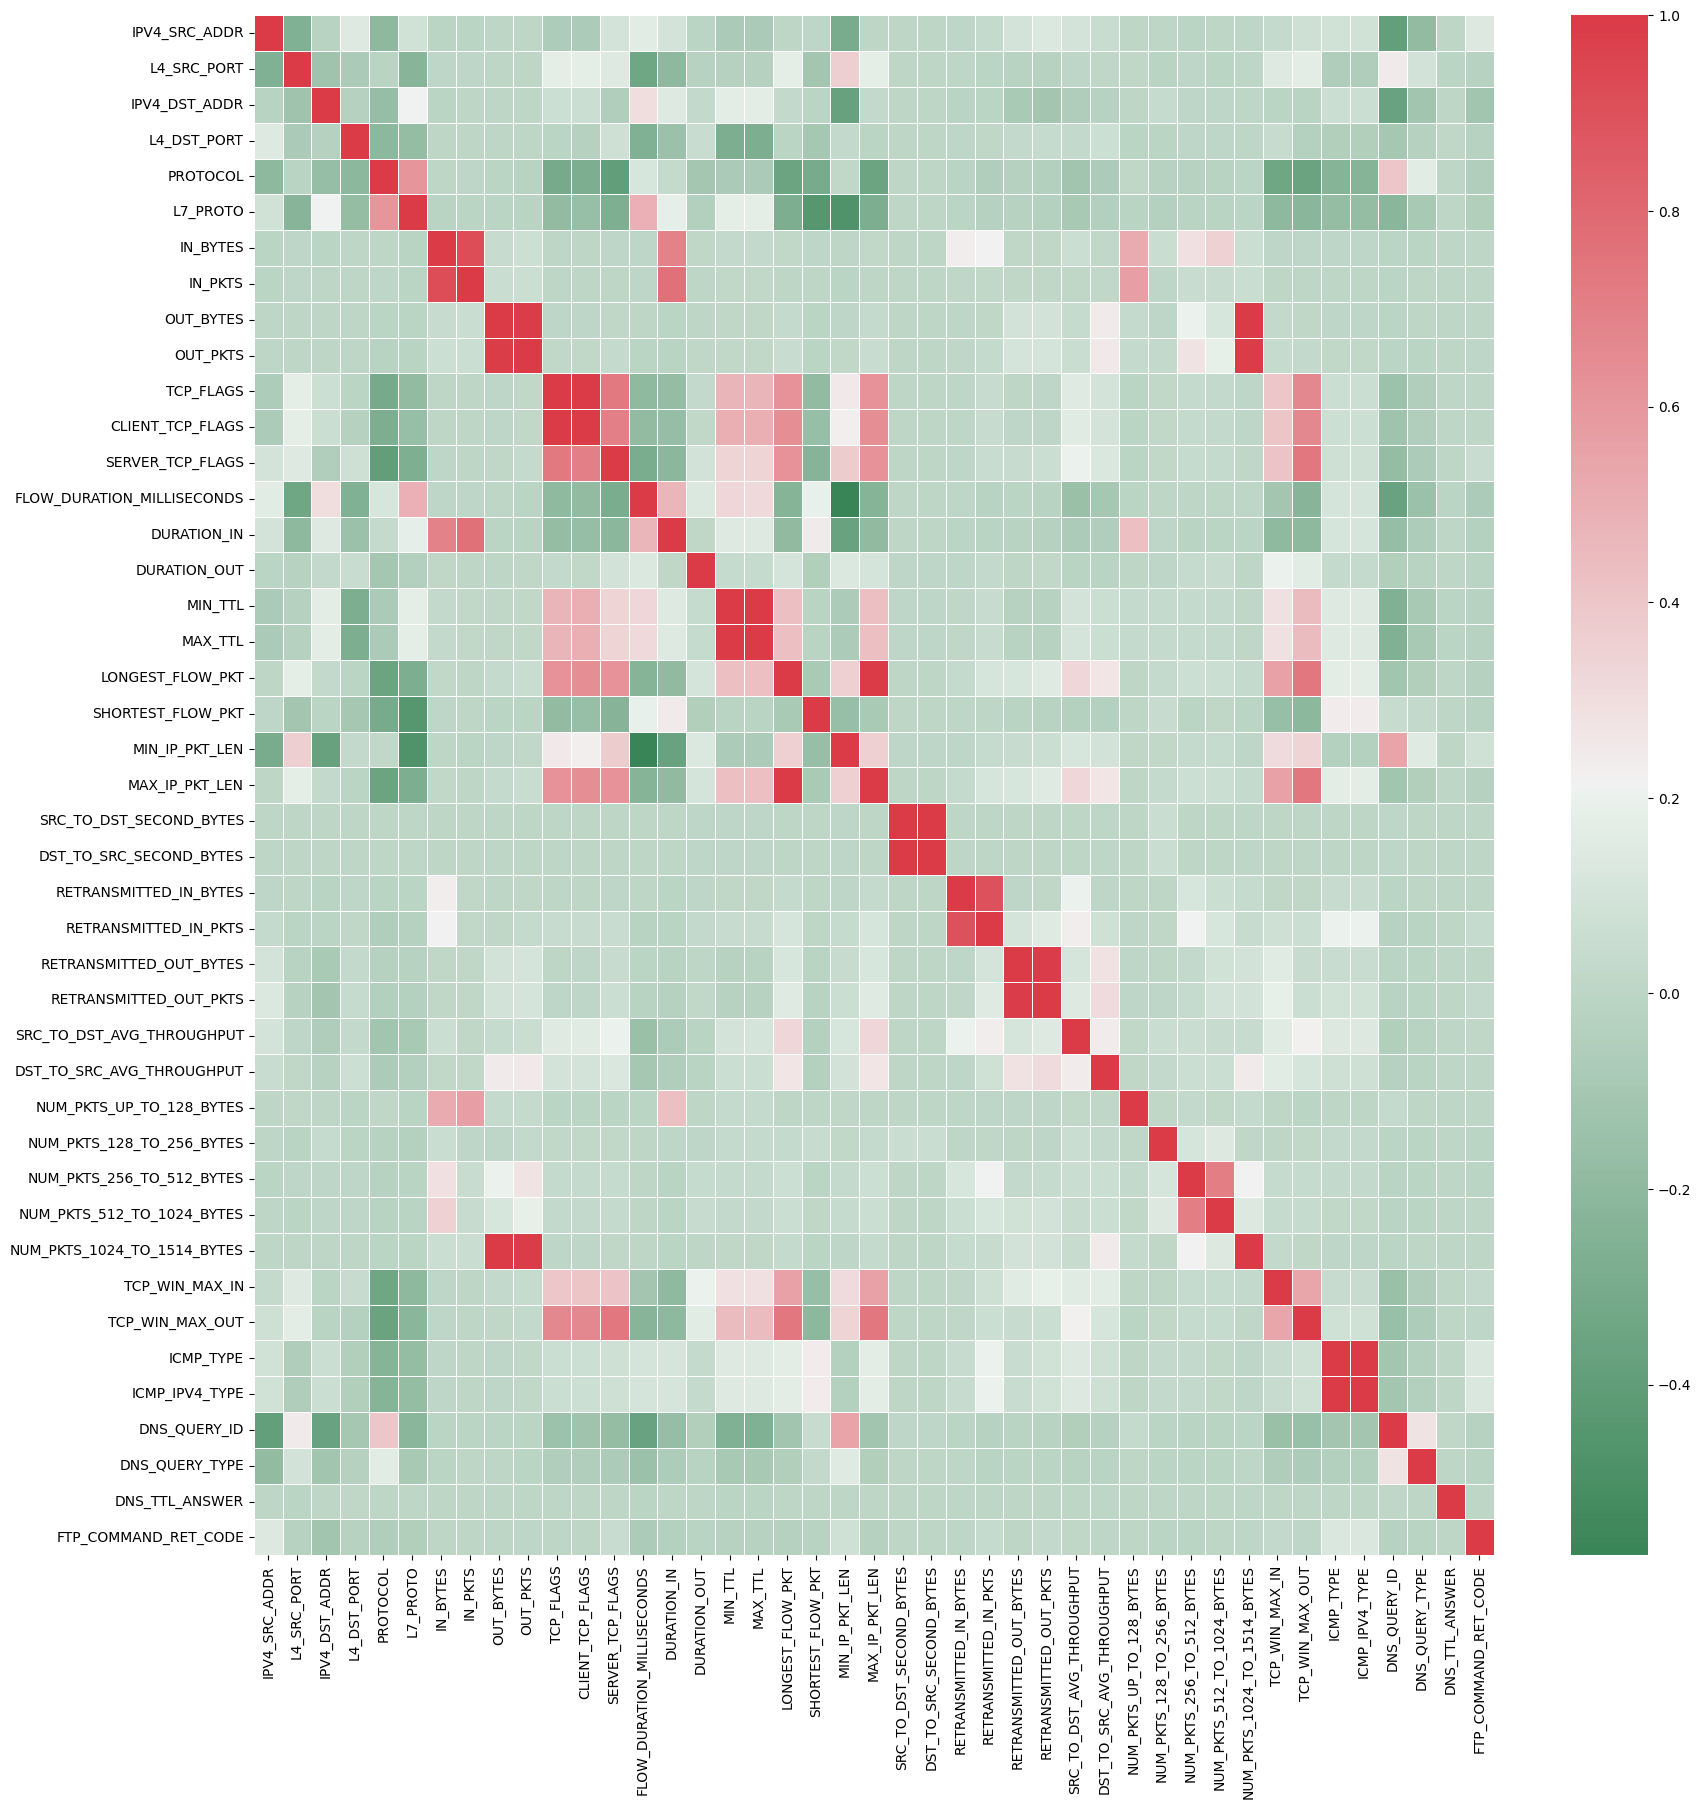

In [34]:
plt.figure(figsize = (20,20))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
attrb_reln = sns.heatmap(X1_test.corr(),linewidths=0.5, cmap=cmap)
plt.savefig('correlations_dataset_test.jpg', dpi=1000)

In [35]:
X_train_scaled_1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'],
      dtype='object')

In [36]:
models_1 = {}
models_1['SVC']= svc
models_1['LogisticRegression']= lr
models_1['DecisionTreeClassifier']= dtc
models_1['Gaussian Naive Bayes Classifier']= gnb
models_1['Bernoulli Naive Bayes Classifier']= bnb
models_1['Gradient Boosting Classifier']= grb
models_1['Random Forest Classifier']= rfe
models_1['XGBoost Classifier']= xgbc
models_1['LightGBM Classifier']= lgbmc
preds_1={}
modelAcc_1={}
for name in models_1:
    models_1[name].fit(X_train_scaled_1, y_train_1)
    preds_1[name] = models_1[name].predict(X_test_scaled_1)
    modelAcc_1[name] = accuracy_score(y_test_1, preds_1[name])

print("Predictions complete.")

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6776
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 41
[LightGBM] [Info] Start training from score -10.260162
[LightGBM] [Info] Start training from score -8.254829
[LightGBM] [Info] Start training from score -1.112230
[LightGBM] [Info] Start training from score -6.289871
[LightGBM] [Info] Start training from score -6.365431
[LightGBM] [Info] Start training from score -1.246445
[LightGBM] [Info] Start training from score -1.442505
[LightGBM] [Info] Start training from score -7.862267
[LightGBM] [Info] Start training from score -8.180721
[LightGBM] [Info] Start training from score -8.709565
[LightGBM] [Info] Start training from score -6.453500
[LightGBM] [Info] Start training from score -3.3617

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
for name in models_1:
    print(line(name), name, 'Model Testing', line(name))
    print(classification_report(y_test_1, preds_1[name]))

************************ SVC Model Testing ************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.96      0.49      0.65        49
           2       0.96      0.97      0.96     66528
           3       1.00      1.00      1.00       353
           4       0.87      0.98      0.92       315
           5       0.97      0.98      0.98     57116
           6       0.98      0.95      0.96     47009
           7       0.85      0.20      0.32        87
           8       0.32      0.90      0.48        60
           9       1.00      0.67      0.81        46
          10       0.00      0.00      0.00       325
          11       0.82      0.65      0.73      6849
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          15       0.47      0.20      0.28      1796
          16       0.00      0.00      0.00        21
          17 

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.82      0.92      0.87     66528
           3       0.87      1.00      0.93       353
           4       0.42      0.13      0.20       315
           5       0.95      0.95      0.95     57116
           6       0.95      0.91      0.93     47009
           7       0.40      0.05      0.08        87
           8       0.24      0.15      0.18        60
           9       1.00      0.37      0.54        46
          10       0.00      0.00      0.00       325
          11       0.70      0.61      0.66      6849
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          15       0.00      0.00      0.00      1796
          16       0.00      0.00      0.00        21
          17       0.62      0.49      0.55      3038
          18       0.00    

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.09      0.92      0.16        49
           2       0.80      0.12      0.21     66528
           3       0.00      0.00      0.00       353
           4       0.21      0.98      0.34       315
           5       0.97      0.87      0.92     57116
           6       0.98      0.85      0.91     47009
           7       0.60      0.03      0.07        87
           8       1.00      0.03      0.06        60
           9       0.00      0.00      0.00        46
          10       0.01      0.97      0.01       325
          11       0.16      0.85      0.27      6849
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          15       0.00      0.00      0.00      1796
          16       0.00      0.00      0.00        21
          17       0.00      0.00      0.00      3038
          18       0.00    

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       0.03      0.67      0.05         6
           1       0.00      0.00      0.00        49
           2       0.95      0.07      0.14     66528
           3       0.26      0.94      0.40       353
           4       0.08      0.63      0.14       315
           5       0.99      0.84      0.91     57116
           6       0.97      0.84      0.90     47009
           7       0.01      0.79      0.02        87
           8       0.00      0.00      0.00        60
           9       0.08      0.72      0.14        46
          10       0.01      0.36      0.02       325
          11       0.22      0.56      0.32      6849
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         0
          15       0.06      0.67      0.10      1796
          16       0.05      0.10      0.07        21
          17       0.14    

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.85      1.00      0.92     66528
           3       0.00      0.00      0.00       353
           4       0.00      0.00      0.00       315
           5       0.98      0.99      0.98     57116
           6       0.98      0.95      0.97     47009
           7       0.00      0.00      0.00        87
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        46
          10       0.00      0.00      0.00       325
          11       0.79      0.32      0.45      6849
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          15       0.00      0.00      0.00      1796
          16       0.00      0.00      0.00        21
          17       0.93      0.28      0.43      3038
          18       0.00    

C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

************************ SVC Model Testing ************************
**************** LogisticRegression Model Testing ****************
************** DecisionTreeClassifier Model Testing **************
********** Gaussian Naive Bayes Classifier Model Testing **********
********* Bernoulli Naive Bayes Classifier Model Testing *********
*********** Gradient Boosting Classifier Model Testing ***********
************* Random Forest Classifier Model Testing *************
**************** XGBoost Classifier Model Testing ****************
**************** LightGBM Classifier Model Testing ****************


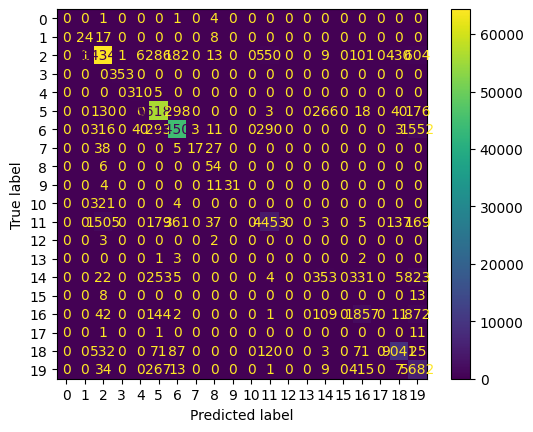

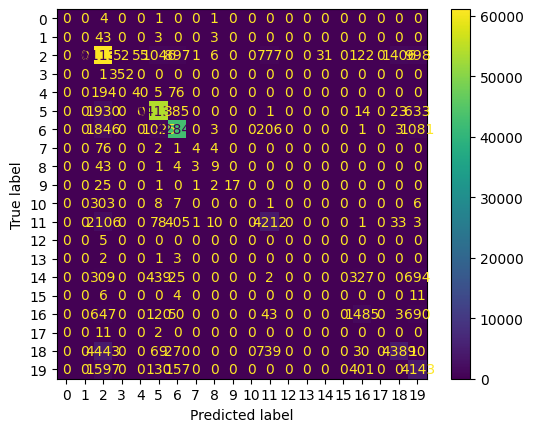

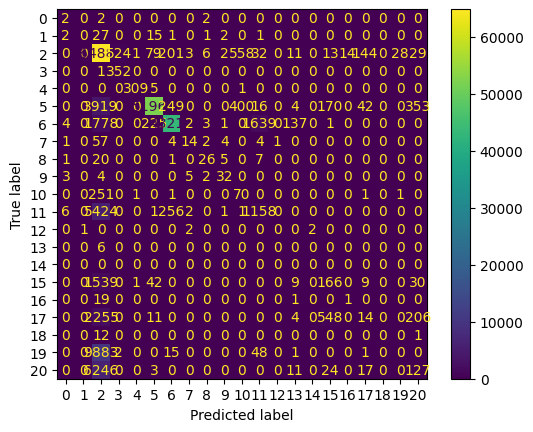

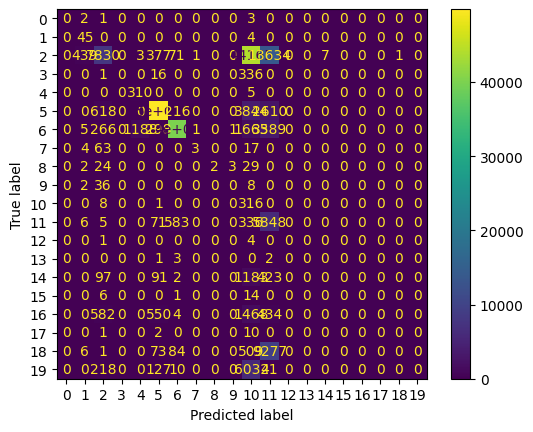

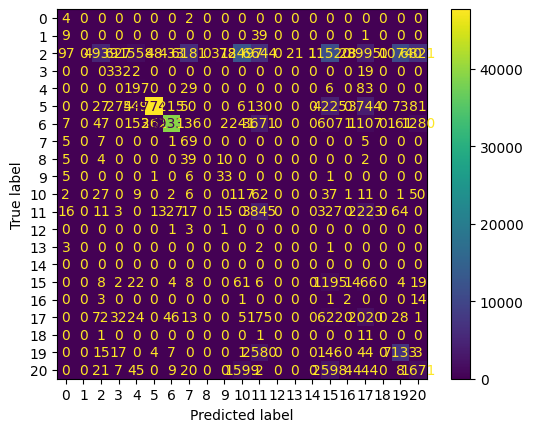

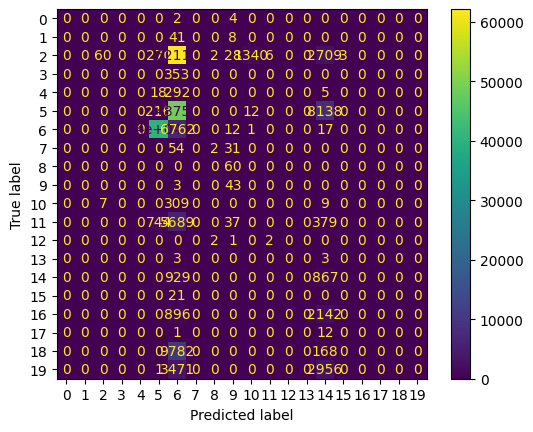

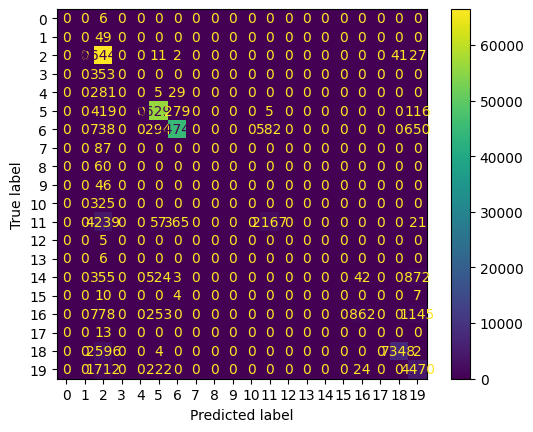

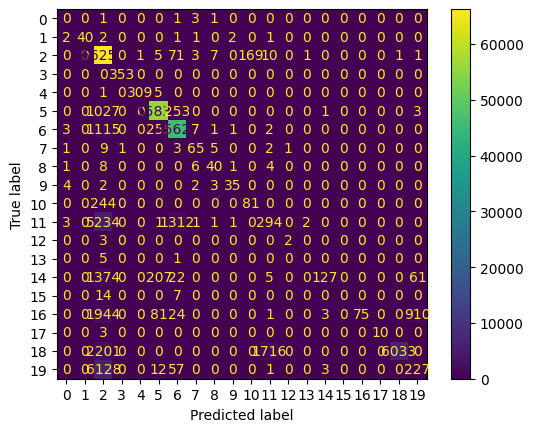

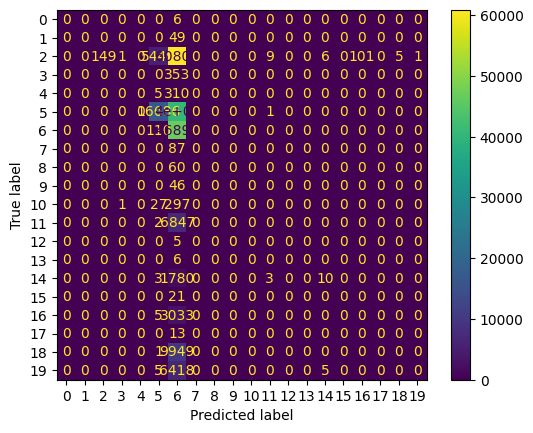

In [38]:
for name in models_1:
    print(line(name), name, 'Model Testing', line(name))
    conf_mat = confusion_matrix(y_true=y_test_1, y_pred=preds_1[name])
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot()

In [39]:
for name in models_1:
    modelAcc_1[name] = accuracy_score(y_test_1, preds_1[name])
    print(name, modelAcc_1[name])
#여기까지 기본코드

SVC 0.93603
LogisticRegression 0.86381
DecisionTreeClassifier 0.81168
Gaussian Naive Bayes Classifier 0.5209
Bernoulli Naive Bayes Classifier 0.543165
Gradient Boosting Classifier 0.03974
Random Forest Classifier 0.91168
XGBoost Classifier 0.877035
LightGBM Classifier 0.31872


In [40]:
"""
#성과 지표 데이터프레임 아직 실패
result = pd.DataFrame()
report_dict = {}
precision_weighted = 0
recall_weighted = 0
f1_weighted = 0
total_support = 0
for name, model in models_1.items():
    report_dict[name] = classification_report(y_test_1, preds_1[name], output_dict=True)
for key, value in report_dict.items():
    if isinstance(value, dict):  # 클래스별 지표인지 확인
        support = value['support']
        precision_weighted += value['precision'] * support
        recall_weighted += value['recall'] * support
        f1_weighted += value['f1-score'] * support
        total_support += support 
weighted_precision = precision_weighted / total_support
weighted_recall = recall_weighted / total_support
weighted_f1 = f1_weighted / total_support
summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Value': [weighted_precision, weighted_recall, weighted_f1, modelAcc_1]
    
})
result = pd.concat([result, summary], axis=0)
print(result)
"""

"\n#성과 지표 데이터프레임 아직 실패\nresult = pd.DataFrame()\nreport_dict = {}\nprecision_weighted = 0\nrecall_weighted = 0\nf1_weighted = 0\ntotal_support = 0\nfor name, model in models_1.items():\n    report_dict[name] = classification_report(y_test_1, preds_1[name], output_dict=True)\nfor key, value in report_dict.items():\n    if isinstance(value, dict):  # 클래스별 지표인지 확인\n        support = value['support']\n        precision_weighted += value['precision'] * support\n        recall_weighted += value['recall'] * support\n        f1_weighted += value['f1-score'] * support\n        total_support += support \nweighted_precision = precision_weighted / total_support\nweighted_recall = recall_weighted / total_support\nweighted_f1 = f1_weighted / total_support\nsummary = pd.DataFrame({\n    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],\n    'Value': [weighted_precision, weighted_recall, weighted_f1, modelAcc_1]\n    \n})\nresult = pd.concat([result, summary], axis=0)\nprint(result)\n"

In [59]:
result

,Metric,Value
0,Precision,0.420823
1,Recall,0.223476
2,F1-Score,0.14671
3,Accuracy,"{'SVC': 0.85106, 'LogisticRegression': 0.81640..."
